In [2]:
import pandas as pd
import seaborn as sns

In [3]:
imdb_df = pd.read_csv("IMDB Dataset.csv")

In [4]:
imdb_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<AxesSubplot:xlabel='sentiment', ylabel='count'>

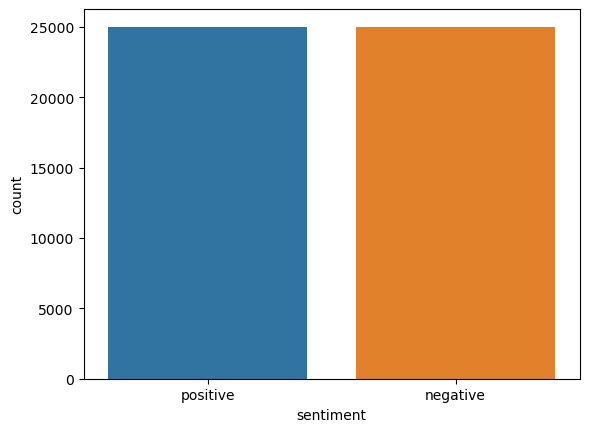

In [6]:
sns.countplot(data=imdb_df,x='sentiment')

In [7]:
X = imdb_df['review']
y = imdb_df['sentiment']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [11]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [13]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [14]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [15]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [16]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      4959
    positive       0.88      0.85      0.86      5041

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



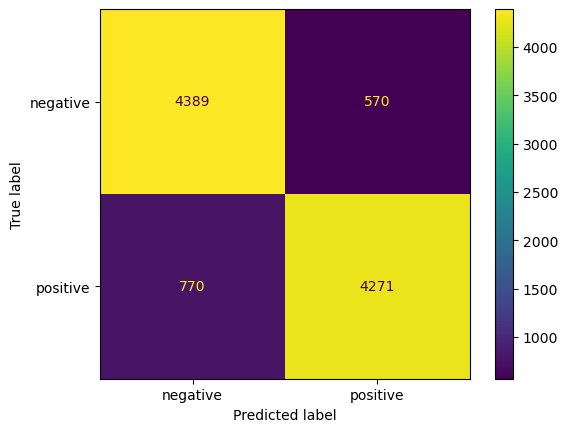

In [17]:
print("NB MODEL")
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4959
    positive       0.89      0.91      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



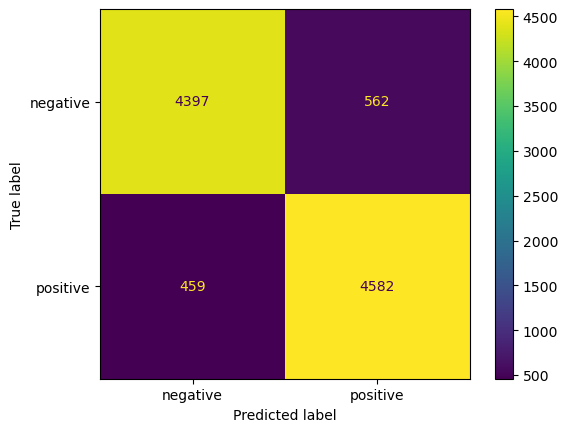

In [18]:
print("Logistic Regression")
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      4959
    positive       0.90      0.90      0.90      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



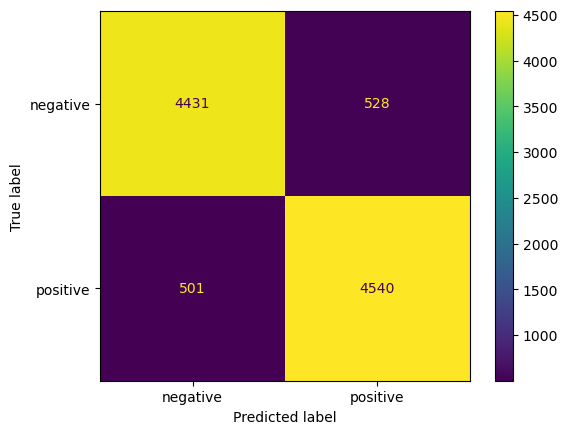

In [19]:
print('SVC')
report(svc)

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [22]:
new_review = ['good movie']
pipe.predict(new_review)

array(['positive'], dtype=object)

In [23]:
new_review = ['ok movie']
pipe.predict(new_review)

array(['negative'], dtype=object)

In [24]:
new_review = ['bad movie']
pipe.predict(new_review)

array(['negative'], dtype=object)

In [25]:
new_review = ['The worst movie of my life']
pipe.predict(new_review)

array(['negative'], dtype=object)

In [26]:
import joblib

In [27]:
joblib.dump(pipe, 'final_model.pkl')

['final_model.pkl']

In [30]:
X.name

'review'

In [33]:
joblib.dump(list(X.name), 'column_name.pkl')

['column_name.pkl']